In [1]:
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
import pandas as pd
# import numpy as np

2022-10-24 00:10:39,976 : INFO : NumExpr defaulting to 4 threads.


In [3]:
df_train=pd.read_csv("data/train.csv") 
df_essays=pd.DataFrame(df_train["full_text"])
df_test=pd.read_csv("data/test.csv")   
y=df_train.drop(["text_id","full_text"],axis=1)  
essays=df_essays["full_text"]
essays=list(essays) 
#essays=" ".join(essays)  
#essays=('''"""''') +essays + ('''"""''')   
target_names=list(y)
df_train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [4]:
len(essays)

3911

In [5]:
essays[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [6]:
# pre processa o texto
# gensim.utils.simple_preprocess (line)
PreprosEssay = list()
for i, essay in enumerate (essays):
  PreprosEssay.append(gensim.utils.simple_preprocess (essay))

In [7]:
#PreprosEssay[1]
len(PreprosEssay)

3911

# testando Word2Vec

In [8]:
# #model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
# #model.train(documents,total_examples=len(documents),epochs=10)

# model = gensim.models.Word2Vec (PreprosEssay, size=150, window=10, min_count=2, workers=10)
# model.train(PreprosEssay,total_examples=len(PreprosEssay),epochs=10)

In [9]:
# dir(model)
# # model.cum_table
# #for word in PreprosEssay[1]:
# for word in PreprosEssay[1][:5]:
#   print(word, model[word])

In [10]:
# w1 = "dirty"
# model.wv.most_similar (positive=w1)#buscando as palavras mais similares

# model.wv.most_similar (positive=w1,topn=6)#tras os 6 valores mais proximos

# testando Doc2Vec

In [11]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(PreprosEssay)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

2022-10-24 00:10:53,211 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-10-24 00:10:53,212 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2022-10-24 00:10:53,213 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2022-10-24T00:10:53.213834', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18363-SP0', 'event': 'created'}
2022-10-24 00:10:53,403 : INFO : collecting all words and their counts
2022-10-24 00:10:53,404 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-10-24 00:10:53,809 : INFO : collected 21111 word types and 3911 unique tags from a corpus of 3911 examples and 1621825 words
2022-10-24 00:10:53,81

2022-10-24 00:11:08,263 : INFO : EPOCH - 9 : training on 1621825 raw words (1128855 effective words) took 1.4s, 829269 effective words/s
2022-10-24 00:11:09,271 : INFO : EPOCH 10 - PROGRESS: at 77.45% examples, 873829 words/s, in_qsize 8, out_qsize 0
2022-10-24 00:11:09,531 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-24 00:11:09,549 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-24 00:11:09,552 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-24 00:11:09,555 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-24 00:11:09,557 : INFO : EPOCH - 10 : training on 1621825 raw words (1128735 effective words) took 1.3s, 876242 effective words/s
2022-10-24 00:11:09,558 : INFO : Doc2Vec lifecycle event {'msg': 'training on 16218250 raw words (11284523 effective words) took 15.1s, 747424 effective words/s', 'datetime': '2022-10-24T00:11:09.558992', 'gensim': '4.1.2', 'python': '3.9.12 (main

In [12]:
# from gensim.test.utils import common_texts
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument


# halfEssays = np.array_split(PreprosEssay,2) #testando so com parte dos valores das essays

# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(halfEssays[0])]
# model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [13]:
# len(halfEssays[0])

In [14]:
# documents[0]

In [15]:
# dir(model)

In [16]:
model.docvecs[0] # posição do documento

C:\Users\arthur\AppData\Local\Temp\ipykernel_13812\3726138103.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs[0] # posição do documento


array([-0.37849298,  0.36131036,  1.7935017 , -0.31978223, -0.85019755],
      dtype=float32)

In [17]:
# dir(model)

In [18]:
# dir(model.scan_vocab)

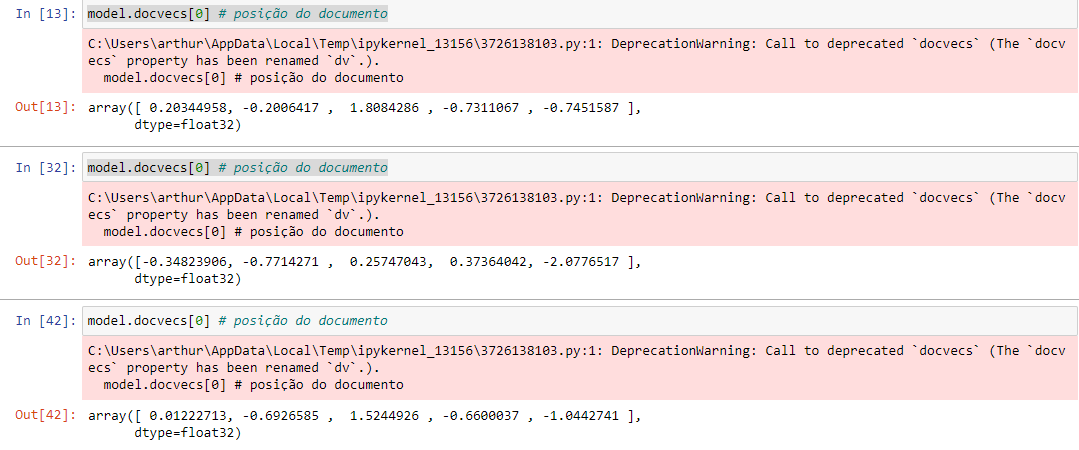

porque os resultados de documentos identicos geram representações vetoriais diferentes ?
resposta: https://stackoverflow.com/questions/50408740/gensim-doc2vec-im-gettting-different-vectors-from-documents-that-are-identical

In [19]:
model.infer_vector("this is the end".split())# extraindo representação vetorial dos modelos

array([-0.02243813,  0.01533613,  0.01339904,  0.04386268, -0.30353817],
      dtype=float32)

In [25]:
model.infer_vector(PreprosEssay[0])

array([-0.7574953 ,  0.15931675,  2.1944063 , -0.5147498 , -0.92636675],
      dtype=float32)

In [59]:
# df_novo = pd.DataFrame(model.docvecs,columns = ['EmbDoc1','EmbDoc2','EmbDoc3','EmbDoc4','EmbDoc5'])
#dir(model.docvecs)
# for i, doc in enumerate(model.dv):
#     print(doc)

# df_novo = pd.DataFrame({'EmbDoc1':model.dv[:,0],'EmbDoc2':model.dv[:,1],'EmbDoc3':model.dv[:,2],'EmbDoc4':model.dv[:,3],'EmbDoc5':model.dv[:,4]})
#model.dv[0][0]
df_novo = pd.DataFrame(columns = ['EmbDoc1','EmbDoc2','EmbDoc3','EmbDoc4','EmbDoc5'])
for i in range(model.dv.__len__()):
    df_novo.loc[i] = [model.dv[i][0],model.dv[i][1],model.dv[i][2],model.dv[i][3],model.dv[i][4]]
    
df_novo


,EmbDoc1,EmbDoc2,EmbDoc3,EmbDoc4,EmbDoc5
0,-0.378493,0.361310,1.793502,-0.319782,-0.850198
1,0.068057,1.106867,-0.153712,-0.823516,-1.784668
2,-0.984724,0.166770,1.674314,-0.708702,-0.818998
3,0.762911,1.347518,-0.571410,-1.322564,-2.055546
4,0.974610,0.220228,-0.367960,-0.001963,-1.740385
...,...,...,...,...,...
3906,-0.610828,-0.773336,0.336453,0.044648,-1.311844
3907,-0.922011,-1.887279,0.796840,-1.972311,-0.986654
3908,-1.340563,1.009742,-0.350708,-0.078652,-1.740720
3909,0.596326,0.041206,-1.647959,-1.225929,-2.136117
